In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from xgboost import XGBClassifier
import lime
import lime.lime_tabular

In [69]:
df=pd.read_csv("diabetes_prediction_dataset.csv") # loading the dataset
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [70]:
print(df.shape)
print(df.info()) # checking Dataset structure 
df.describe() # Summary statistics

(100000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [71]:
#  Missing Values Check
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [72]:
unique_counts = df.nunique()

# Print the results
print(unique_counts)

# If you want more details, you can also print the unique values themselves
for column in df.columns:
    print(f"\nUnique values in {column}:")
    print(df[column].unique())

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

Unique values in gender:
['Female' 'Male' 'Other']

Unique values in age:
[80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]

Unique values in hypertension:
[0 1]

Unique va

In [73]:
le=LabelEncoder()
df['gender']=le.fit_transform(df.gender)
df['smoking_history']=le.fit_transform(df.smoking_history)

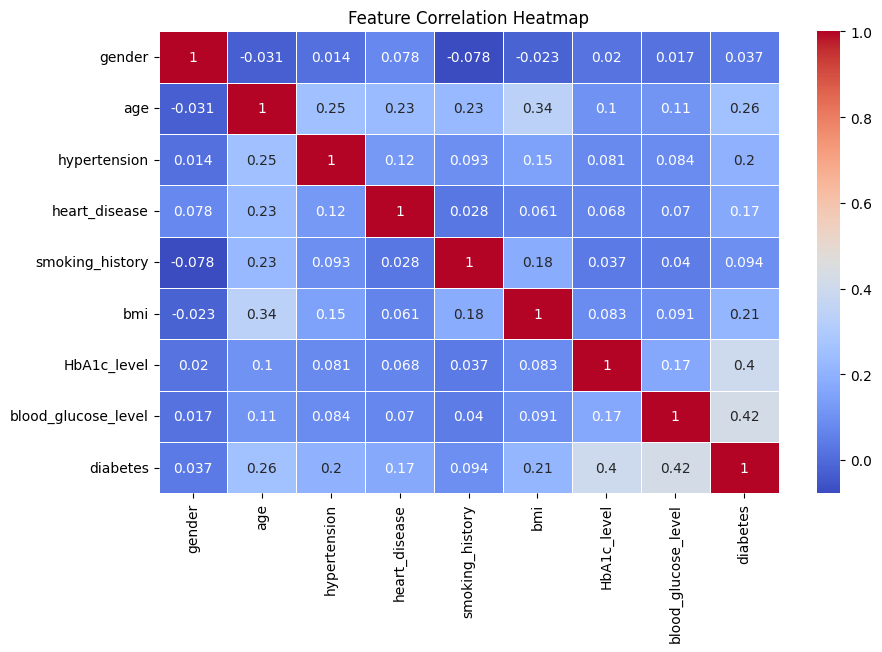

In [74]:
#  Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

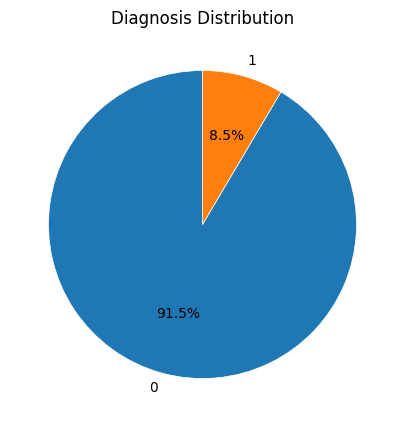

In [75]:
plt.figure(figsize=(5, 5))
df['diabetes'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90,wedgeprops={'linewidth': 0.5,'edgecolor':'white'})
plt.title('Diagnosis Distribution')
plt.ylabel("")
plt.show()

<Figure size 1200x800 with 0 Axes>

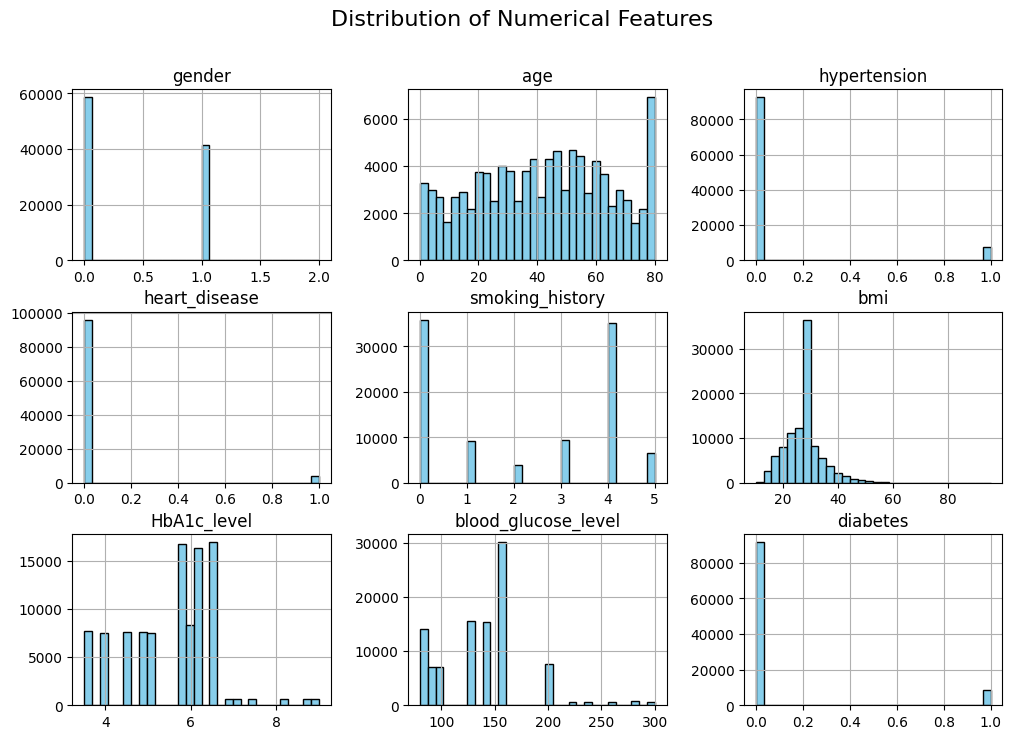

In [76]:
plt.figure(figsize=(12, 8))
df.hist(bins=30, figsize=(12, 8), layout=(3, 3), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_8084\4164454344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="gender", data=df, ax=axes[0], palette="Set2")
C:\Users\hp\AppData\Local\Temp\ipykernel_8084\4164454344.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="smoking_history", data=df, ax=axes[1], palette="Set1", order=df["smoking_history"].value_counts().index)


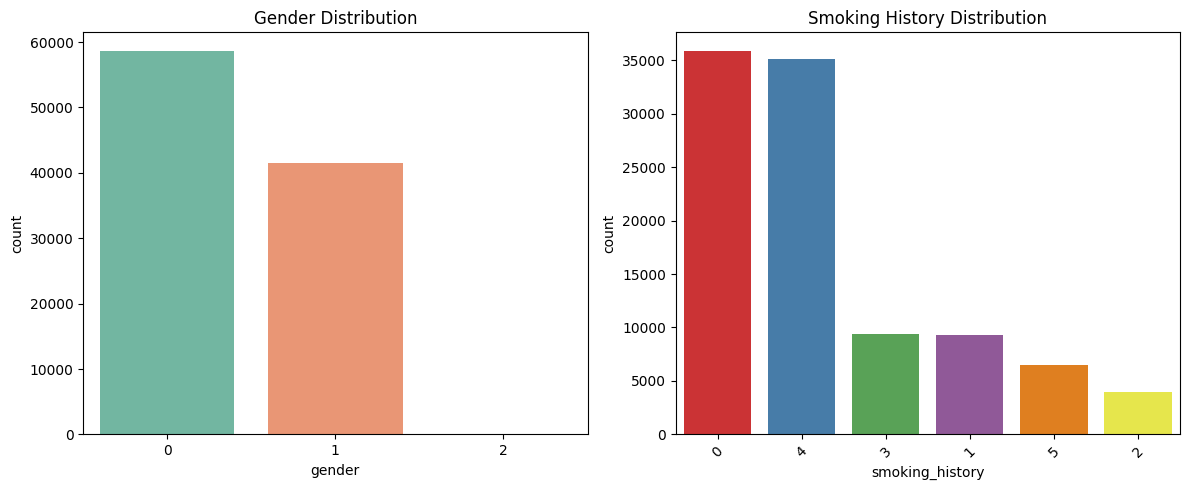

In [77]:

# Count plots for categorical variables
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x="gender", data=df, ax=axes[0], palette="Set2")
axes[0].set_title("Gender Distribution")

sns.countplot(x="smoking_history", data=df, ax=axes[1], palette="Set1", order=df["smoking_history"].value_counts().index)
axes[1].set_title("Smoking History Distribution")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [78]:
x = df.drop(columns=["diabetes"])  # Features
y = df["diabetes"]  # Target



best_features = SelectKBest(score_func=f_classif, k=5)
fit = best_features.fit(x, y)
selected_features= x.columns[fit.get_support(indices=True)]





In [79]:
X = x[selected_features]

In [80]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize XGBoost Classifier
xgb_classifier = XGBClassifier(
    n_estimators=300,
    max_depth=10,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Predictions
y_pred = xgb_classifier.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the XGBoost model on test data is: {accuracy}")

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
cm_xgb = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm_xgb)
print("")

# Calculate RMSE, MAE, and MBE
XGB_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
XGB_mae = mean_absolute_error(y_test, y_pred)
XGB_mbe = np.mean(y_test - y_pred)
     
print(f"XGBoost RMSE: {XGB_rmse}")
print(f"XGBoost MAE: {XGB_mae}")
print(f"XGBoost MBE: {XGB_mbe}")

The accuracy of the XGBoost model on test data is: 0.9682
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.90      0.70      0.79      1708

    accuracy                           0.97     20000
   macro avg       0.94      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000

Confusion Matrix:
 [[18162   130]
 [  506  1202]]

XGBoost RMSE: 0.1783255450012701
XGBoost MAE: 0.0318
XGBoost MBE: 0.0188


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf_classifier = RandomForestClassifier(
    n_estimators=300,
    min_samples_split=2,
    min_samples_leaf=4,
    max_depth=10,
    bootstrap=True
)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model on test data is: {accuracy}")

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
cm_rfc = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm_rfc)
print("")

# Calculate RMSE, MAE, and MBE
RF_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
RF_mae = mean_absolute_error(y_test, y_pred)
RF_mbe = np.mean(y_test - y_pred)
     
print(f"RandomForest RMSE: {RF_rmse}")
print(f"RandomForest MAE: {RF_mae}")
print(f"RandomForest MBE: {RF_mbe}")

The accuracy of the model on test data is: 0.97235
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.68      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000

Confusion Matrix:
 [[18289     3]
 [  550  1158]]

RandomForest RMSE: 0.16628289148315892
RandomForest MAE: 0.02765
RandomForest MBE: 0.02735


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_classifier = SVC()


svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model on test data is: {accuracy}")

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
cm_svm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm_rfc)
print("")

# Calculate RMSE, MAE, and MBE
SVM_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
SVM_mae = mean_absolute_error(y_test, y_pred)
SVM_mbe = np.mean(y_test - y_pred)
     
print(f"SVM RMSE: {SVM_rmse}")
print(f"SVM MAE: {SVM_mae}")
print(f"SVM MBE: {SVM_mbe}")


The accuracy of the model on test data is: 0.96475
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     18292
           1       0.99      0.59      0.74      1708

    accuracy                           0.96     20000
   macro avg       0.98      0.80      0.86     20000
weighted avg       0.97      0.96      0.96     20000

Confusion Matrix:
 [[18289     3]
 [  550  1158]]

SVM RMSE: 0.18774983355518587
SVM MAE: 0.03525
SVM MBE: 0.03405


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


clf=MLPClassifier(hidden_layer_sizes=(150,100,50,25),activation='logistic',max_iter=1000,solver = 'adam',learning_rate_init = 0.01, learning_rate = 'adaptive', batch_size = 32)
clf.fit(X_train,y_train)



y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model on test data is: {accuracy}")

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
cm_clf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm_rfc)
print("")

# Calculate RMSE, MAE, and MBE
NN_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
NN_mae = mean_absolute_error(y_test, y_pred)
NN_mbe = np.mean(y_test - y_pred)
     
print(f"NN RMSE: {NN_rmse}")
print(f"NN MAE: {NN_mae}")
print(f"NN MBE: {NN_mbe}")

d:\diabetes\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


The accuracy of the model on test data is: 0.97085
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       1.00      0.66      0.79      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.83      0.89     20000
weighted avg       0.97      0.97      0.97     20000

Confusion Matrix:
 [[18289     3]
 [  550  1158]]

NN RMSE: 0.17073371078963873
NN MAE: 0.02915
NN MBE: 0.02915


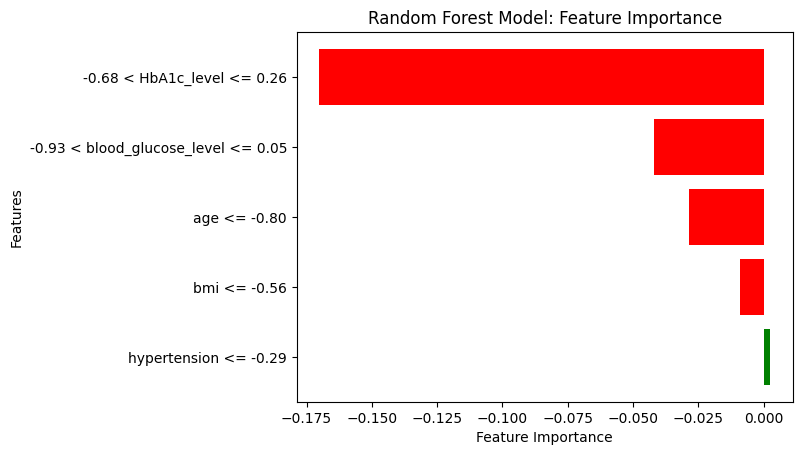

In [85]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=X.columns, class_names=[0, 1], discretize_continuous=True)
i = 0
exp = explainer.explain_instance(X_test[i], rf_classifier.predict_proba, num_features=5)

# Create the explanation plot
fig = exp.as_pyplot_figure()

# Adding labels and title
plt.xlabel('Feature Importance')  # Label for X-axis
plt.ylabel('Features')  # Label for Y-axis
plt.title('Random Forest Model: Feature Importance')  # Title for the graph

# Display the plot
plt.show()

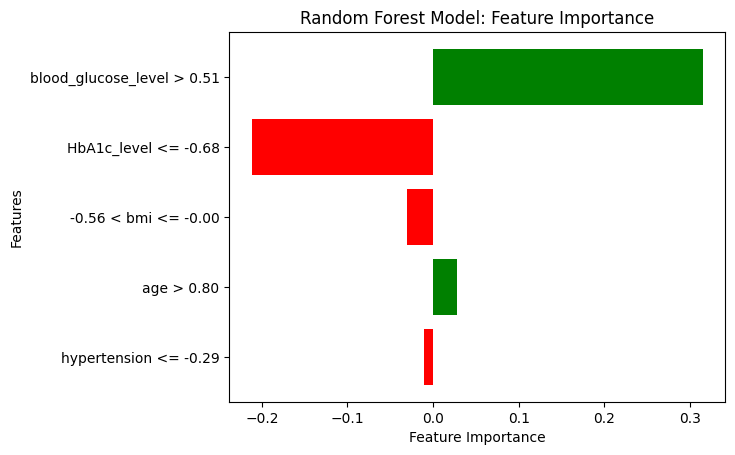

In [86]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=X.columns, class_names=[0, 1], discretize_continuous=True)
i = 2
exp = explainer.explain_instance(X_test[i], rf_classifier.predict_proba, num_features=5)

# Create the explanation plot
fig = exp.as_pyplot_figure()

# Adding labels and title
plt.xlabel('Feature Importance')  # Label for X-axis
plt.ylabel('Features')  # Label for Y-axis
plt.title('Random Forest Model: Feature Importance')  # Title for the graph

# Display the plot
plt.show()

In [84]:
data = {
    "models": ["Random Forest","XGBoost","Neural Network","SVM Classifier"],
    "rmse": [RF_rmse,XGB_rmse,NN_rmse,SVM_rmse],
    "mae": [RF_mae,XGB_mae,NN_mae,SVM_mae],
    "mbe": [RF_mbe,XGB_mbe,NN_mbe,SVM_mbe]
}

# Create a DataFrame
df_evaluation= pd.DataFrame(data)

# Display the DataFrame
print(df_evaluation)

           models      rmse      mae      mbe
0   Random Forest  0.166283  0.02765  0.02735
1         XGBoost  0.178326  0.03180  0.01880
2  Neural Network  0.170734  0.02915  0.02915
3  SVM Classifier  0.187750  0.03525  0.03405


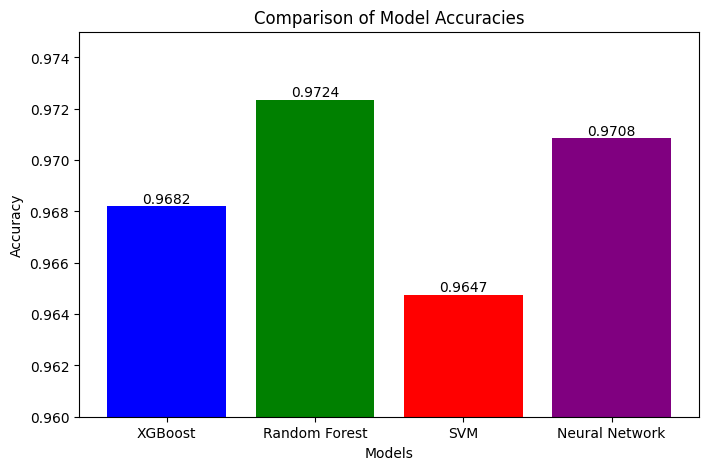

In [4]:
# Model names and their corresponding accuracies
models = ["XGBoost", "Random Forest", "SVM", "Neural Network"]
accuracies = [0.9682, 0.97235, 0.96475, 0.97085]

# Create bar plot
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])

# Labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0.96, 0.975)

# Display values on bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc, f"{acc:.4f}", ha='center', va='bottom')

# Show plot
plt.show()